In [2]:
!pip install numpy pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 533.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 515.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 538.8 kB/s eta 0:00:00a 0:00:01


In [4]:
!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [6]:
#Read dataset
train_data = pd.read_csv('amazon.csv')
train_data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [7]:
train_data.shape

(1465, 16)

In [8]:
train_data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
train_data.duplicated().sum()

np.int64(0)

In [10]:
train_data['product_id'] = train_data['product_id'].str.extract(r'(\d+)').astype(float)

In [11]:
train_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,7.0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,98.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,96.0,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,8.0,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,8.0,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,8.0,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,1.0,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/4

In [12]:
#Basic Statistics 
num_users = train_data['user_id'].nunique()
num_items = train_data['product_id'].nunique()
num_rating = train_data['rating'].nunique()
print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of rating: {num_rating}")

Number of users: 1194
Number of items: 114
Number of rating: 28


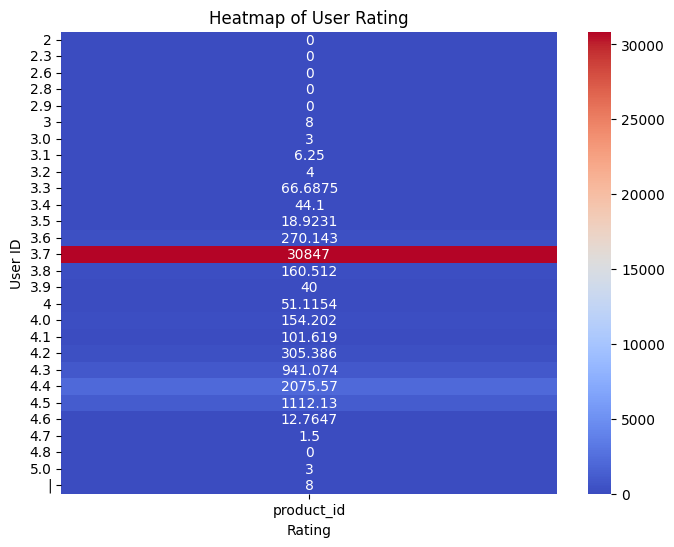

In [13]:
#Pivot the Dataframe to create a heatmap
heatmap_data = train_data.pivot_table('product_id','rating')

#create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Rating')
plt.xlabel('Rating')
plt.ylabel('User ID')
plt.show()

In [14]:
#Distribution of interaction


Text(0.5, 1.0, 'Most Popular Items')

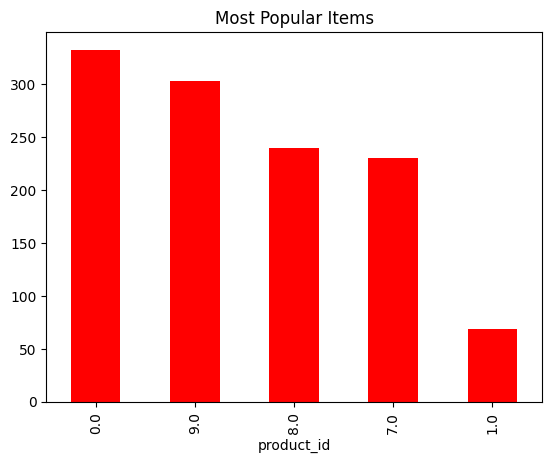

In [15]:
#Most Popular items
popular_items = train_data['product_id'].value_counts().head(5)
popular_items.plot(kind='bar' ,color='red')
plt.title("Most Popular Items")

<Axes: xlabel='rating'>

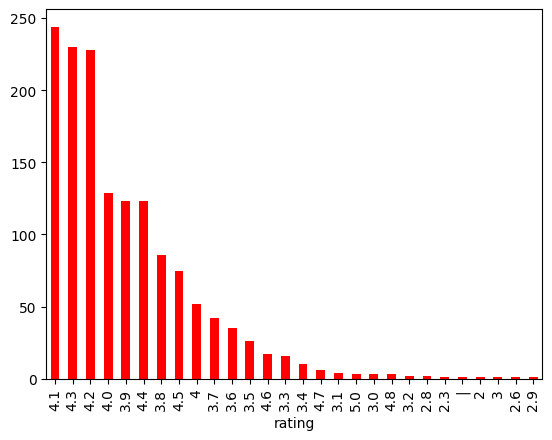

In [16]:
#most rated
train_data['rating'].value_counts().plot(kind='bar',color='red')

In [17]:
pip install spacy

ERROR: Could not find a version that satisfies the requirement spacy (from versions: none)
ERROR: No matching distribution found for spacy
Note: you may need to restart the kernel to use updated packages.


In [27]:
!pip install --upgrade spacy
!pip install --upgrade pydantic

  Using cached spacy-3.8.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.10-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.0 kB)
  Using cached cymem-2.0.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.4 kB)
  Using cached preshed-3.0.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached thinc-8.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.4.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.12.5-py3-none-any.whl.metadata (15 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 547.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [29]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_extract_tags_from = ['about_product']

for column in columns_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

TypeError: ForwardRef._evaluate() missing 1 required keyword-only argument: 'recursive_guard'

In [113]:
train_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Tags
0,7.0,Wayona Nylon Braided USB to Lightning Fast Cha...,,₹399,"₹1,099",64%,4.2,"24,269","high, compatibility, compatible, iphone, 12, 1...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,", high, compatibility, compatible, iphone, 12,..."
1,98.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,,₹199,₹349,43%,4.0,"43,994","compatible, type, c, enabled, devices, android...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,", compatible, type, c, enabled, devices, andro..."
2,96.0,Sounce Fast Phone Charging Cable & Data Sync U...,,₹199,"₹1,899",90%,3.9,"7,928","fast, charger, data, built, safety, proctectio...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,", fast, charger, data, built, safety, proctect..."
3,8.0,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,,₹329,₹699,53%,4.2,"94,363","boat, deuce, usb, 300, 2, 1, cable, compatible...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,", boat, deuce, usb, 300, 2, 1, cable, compatib..."
4,8.0,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,,₹154,₹399,61%,4.2,"16,905","charge, sync, cable, comes, charging, data, sy...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,", charge, sync, cable, comes, charging, data, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,8.0,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,,₹379,₹919,59%,4,"1,090","supreme, quality, 90, gram, 3, layer, thik, pp...","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,", supreme, quality, 90, gram, 3, layer, thik, ..."
1461,1.0,Prestige Delight PRWO Electric Rice Cooker (1 ...,,"₹2,280","₹3,045",25%,4.1,"4,118","230, volts, 400, watts, 1, year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k

In [120]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [122]:
train_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Tags
0,7.0,Wayona Nylon Braided USB to Lightning Fast Cha...,,₹399,"₹1,099",64%,4.2,"24,269","high, compatibility, compatible, iphone, 12, 1...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"high, compatibility, compatible, iphone, 12, 1..."
1,98.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,,₹199,₹349,43%,4.0,"43,994","compatible, type, c, enabled, devices, android...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"compatible, type, c, enabled, devices, android..."
2,96.0,Sounce Fast Phone Charging Cable & Data Sync U...,,₹199,"₹1,899",90%,3.9,"7,928","fast, charger, data, built, safety, proctectio...","AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"fast, charger, data, built, safety, proctectio..."
3,8.0,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,,₹329,₹699,53%,4.2,"94,363","boat, deuce, usb, 300, 2, 1, cable, compatible...","AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"boat, deuce, usb, 300, 2, 1, cable, compatible..."
4,8.0,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,,₹154,₹399,61%,4.2,"16,905","charge, sync, cable, comes, charging, data, sy...","AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"charge, sync, cable, comes, charging, data, sy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,8.0,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,,₹379,₹919,59%,4,"1,090","supreme, quality, 90, gram, 3, layer, thik, pp...","AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,"supreme, quality, 90, gram, 3, layer, thik, pp..."
1461,1.0,Prestige Delight PRWO Electric Rice Cooker (1 ...,,"₹2,280","₹3,045",25%,4.1,"4,118","230, volts, 400, watts, 1, year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k

In [324]:
train_data['user_id'] = train_data['user_id'].str.extract(r'(\d+)').astype(float)
train_data['rating'] = pd.to_numeric(train_data['rating'], errors='coerce')

In [326]:
average_ratings = train_data.groupby(['product_name','rating_count','img_link'])['rating'].mean().reset_index()

In [328]:
top_rated_items = average_ratings.sort_values(by='rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [330]:
# rating_base_recommendation['rating'] = rating_base_recommendation['rating'].astype(int)
# rating_base_recommendation['rating_count'] = rating_base_recommendation['rating_count'].astype(int)

In [332]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['product_name','rating','rating_count','img_link']] = rating_base_recommendation[['product_name','rating','rating_count','img_link']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\moham\AppData\Local\Temp\ipykernel_14248\1363236603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['product_name','rating','rating_count','img_link']] = rating_base_recommendation[['product_name','rating','rating_count','img_link']]


,product_name,rating_count,img_link,rating
1123,Syncwire LTG to USB Cable for Fast Charging Co...,5,https://m.media-amazon.com/images/I/317OoQfs1g...,5.0
86,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,https://m.media-amazon.com/images/I/31+Rg6Z46d...,5.0
803,"Oratech Coffee Frother electric, milk frother ...",28,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
551,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...","3,964",https://m.media-amazon.com/images/W/WEBP_40237...,4.8
1121,Swiffer Instant Electric Water Heater Faucet T...,"53,803",https://m.media-amazon.com/images/I/41+t2HWvwF...,4.8
1087,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"5,935",https://m.media-amazon.com/images/I/51uVckL1jR...,4.7
394,"FIGMENT Handheld Milk Frother Rechargeable, 3-...","1,729",https://m.media-amazon.com/images/I/51oN+8Zs5Y...,4.7
1322,Zuvexa USB Rechargeable Electric Foam Maker - ...,54,https://m.media-amazon.com/images/I/41714O1hnm...,4.7
1102,Spigen EZ Fit Tempered Glass Screen Protector ...,"7,779",https://m.media-amazon.com/images/I/51EiPNlJDg...,4.7
261,Campfire Spring Chef Prolix Instant Portable W...,"2,591",https://m.media-amazon.com/images/W/WEBP_40237...,4.7


In [334]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [336]:
item_name = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
item_index = train_data[train_data['product_name'] == item_name].index[0]

In [338]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [340]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [342]:
train_data.iloc[recommended_items_indics][['product_name','rating','rating_count']]

,product_name,rating,rating_count
369,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,270"
614,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,269"
220,Wayona Nylon Braided Usb Syncing And Charging ...,4.2,"24,269"
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,4.2,"24,269"
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,4.2,"24,269"
80,Wayona Usb Nylon Braided Data Sync And Chargin...,4.2,"24,269"
166,Wayona Nylon Braided Lightning USB Data Sync &...,4.2,"13,120"
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,4.2,"24,269"
208,MYVN LTG to USB for Fast Charging & Data Sync ...,3.7,"2,249"


In [344]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['product_name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['product_name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['product_name','rating','rating_count']]

    return recommended_items_details

In [346]:
# Example: Get content-based recommendations for a specific item
item_name = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,product_name,rating,rating_count
369,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,270"
614,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,269"
220,Wayona Nylon Braided Usb Syncing And Charging ...,4.2,"24,269"
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,4.2,"24,269"
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,4.2,"24,269"
80,Wayona Usb Nylon Braided Data Sync And Chargin...,4.2,"24,269"
166,Wayona Nylon Braided Lightning USB Data Sync &...,4.2,"13,120"
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,4.2,"24,269"


In [348]:
train_data

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Tags
0,7.0,Wayona Nylon Braided USB to Lightning Fast Cha...,,₹399,"₹1,099",64%,4.2,"24,269","high, compatibility, compatible, iphone, 12, 1...",3.0,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"high, compatibility, compatible, iphone, 12, 1..."
1,98.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,,₹199,₹349,43%,4.0,"43,994","compatible, type, c, enabled, devices, android...",3.0,"ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"compatible, type, c, enabled, devices, android..."
2,96.0,Sounce Fast Phone Charging Cable & Data Sync U...,,₹199,"₹1,899",90%,3.9,"7,928","fast, charger, data, built, safety, proctectio...",3.0,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"fast, charger, data, built, safety, proctectio..."
3,8.0,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,,₹329,₹699,53%,4.2,"94,363","boat, deuce, usb, 300, 2, 1, cable, compatible...",5.0,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"boat, deuce, usb, 300, 2, 1, cable, compatible..."
4,8.0,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,,₹154,₹399,61%,4.2,"16,905","charge, sync, cable, comes, charging, data, sy...",3.0,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"charge, sync, cable, comes, charging, data, sy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,8.0,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,,₹379,₹919,59%,4.0,"1,090","supreme, quality, 90, gram, 3, layer, thik, pp...",6.0,"Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,"supreme, quality, 90, gram, 3, layer, thik, pp..."
1461,1.0,Prestige Delight PRWO Electric Rice Cooker (1 ...,,"₹2,280","₹3,045",25%,4.1,"4,118","230, volts, 400, watts, 1, year",5.0,"Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,"230, volts, 400, watts, 1, year"
1462,9.0,Bajaj Majesty RX10 2000 Watts Heat Convector R...,,"₹2,219","₹3,080",28%,3.6,468,"international, design, heat, settings, 1000, w...",4.0,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R.

In [350]:
user_item_matrix = train_data.pivot_table(index='user_id', columns='product_id', values='rating',aggfunc='mean').fillna(0).astype(int)

In [352]:
user_similarity = cosine_similarity(user_item_matrix)

In [358]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [370]:
user_similarities = user_similarity[target_user_index]

similar_user_indices = user_similarities.argsort()[::-1][1:]

In [378]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['product_id'].isin(recommend_items)][['product_name','rating_count','img_link','rating']]

In [380]:
recommended_items_details.head(10)

,product_name,rating_count,img_link,rating
46,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,"8,131",https://m.media-amazon.com/images/I/31+NwZ8gb1...,4.1
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","4,26,973",https://m.media-amazon.com/images/I/41bCxnHksn...,4.4
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","4,26,973",https://m.media-amazon.com/images/I/41eJqkFjCR...,4.4
125,AmazonBasics 6-Feet DisplayPort (not USB port)...,"28,638",https://m.media-amazon.com/images/I/41F6ukNxcC...,4.1
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,"1,79,692",https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
161,Wayona Type C Cable Nylon Braided USB C QC 3.0...,"6,255",https://m.media-amazon.com/images/I/41-NYo+m0J...,4.3
165,LOHAYA Television Remote Compatible with Samsu...,"1,193",https://m.media-amazon.com/images/I/31vPhcWqqW...,3.9
189,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
222,Caprigo Heavy Duty TV Wall Mount Stand for 12 ...,"1,161",https://m.media-amazon.com/images/I/41yMQskyzF...,4.1


In [386]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='user_id', columns='product_id', values='rating',aggfunc='mean').fillna(0).astype(int)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['product_id'].isin(recommend_items)][['product_name','rating_count','img_link','rating']]

    return recommended_items_details.head(10)

# Example usage
target_user_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,product_name,rating_count,img_link,rating
46,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,"8,131",https://m.media-amazon.com/images/I/31+NwZ8gb1...,4.1
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","4,26,973",https://m.media-amazon.com/images/I/41bCxnHksn...,4.4
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","4,26,973",https://m.media-amazon.com/images/I/41eJqkFjCR...,4.4
125,AmazonBasics 6-Feet DisplayPort (not USB port)...,"28,638",https://m.media-amazon.com/images/I/41F6ukNxcC...,4.1
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,"1,79,692",https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
161,Wayona Type C Cable Nylon Braided USB C QC 3.0...,"6,255",https://m.media-amazon.com/images/I/41-NYo+m0J...,4.3
165,LOHAYA Television Remote Compatible with Samsu...,"1,193",https://m.media-amazon.com/images/I/31vPhcWqqW...,3.9
189,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
222,Caprigo Heavy Duty TV Wall Mount Stand for 12 ...,"1,161",https://m.media-amazon.com/images/I/41yMQskyzF...,4.1


In [388]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()
    
    return hybrid_rec.head(10)

In [390]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)':


,product_name,rating,rating_count,img_link
369,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,270",NaN
614,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2,"24,269",NaN
220,Wayona Nylon Braided Usb Syncing And Charging ...,4.2,"24,269",NaN
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,4.2,"24,269",NaN
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,4.2,"24,269",NaN
80,Wayona Usb Nylon Braided Data Sync And Chargin...,4.2,"24,269",NaN
166,Wayona Nylon Braided Lightning USB Data Sync &...,4.2,"13,120",NaN
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,4.2,"24,269",NaN
208,MYVN LTG to USB for Fast Charging & Data Sync ...,3.7,"2,249",NaN
261,Wayona Nylon Braided Usb Type C 3Ft 1M 3A Fast...,4.2,"10,576",NaN


In [394]:
train_data['product_name'][1460]

'Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | for All Types of RO Water purifiers (5 Piece, White, 10 Inch, 5 Micron) - RO Spun Filter Cartridge Sponge Replacement Water Filter Candle'

In [398]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = 'Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | for All Types of RO Water purifiers (5 Piece, White, 10 Inch, 5 Micron) - RO Spun Filter Cartridge Sponge Replacement Water Filter Candle'


hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | for All Types of RO Water purifiers (5 Piece, White, 10 Inch, 5 Micron) - RO Spun Filter Cartridge Sponge Replacement Water Filter Candle':


,product_name,rating,rating_count,img_link
1370,KONVIO NEER 10 Inch Spun Filter (PP SPUN) Cart...,4.3,"1,436",NaN
1376,"Macmillan Aquafresh 5 Micron PS-05 10"" in PP S...",3.9,"1,004",NaN
1416,Aqua d pure Active Copper 12-L RO+UV Water Fil...,4.5,287,NaN
1424,KENT POWP-Sediment Filter 10'' Thread WCAP,4.1,490,NaN
1301,Livpure Glo Star RO+UV+UF+Mineraliser - 7 L St...,4.3,97,NaN
1325,Aquaguard Aura RO+UV+UF+Taste Adjuster(MTDS) w...,4.0,"11,206",NaN
1412,V-Guard Zenora RO+UF+MB Water Purifier | Suita...,4.3,"5,891",NaN
1289,Aquadpure Copper + Mineral RO+UV+UF 10 to 12 L...,4.6,124,NaN
1368,Pajaka® South Indian Filter Coffee Maker 200 M...,4.1,"1,456",NaN
1285,Inalsa Vacuum Cleaner Wet and Dry Micro WD10 w...,3.9,"8,095",NaN
